In [ ]:
%run -i sampler.py
%matplotlib inline

In [ ]:
sample = Sampler()

In [ ]:
image_data = sample.get_random_mnist()
print image_data.shape
image_data = np.reshape(image_data, [28, 28])

In [ ]:
sample.show_image(image_data)

In [ ]:
data = mnist.train.next_batch(500)[0]
data = np.reshape(data, [500, 28, 28, 1])
encoded = sample.encode(data)

In [ ]:
generated = sample.model.generate(encoded)

In [ ]:
print generated.shape

In [ ]:
sample.show_image(generated[0])

In [ ]:
sample.show_image(data[0])

In [ ]:
def visualize(i):
    real = data[i]
    fake = generated[i]
    sample.show_image(real)
    sample.show_image(fake)

In [ ]:
visualize(10)

In [ ]:
z = np.random.normal(size=[500,sample.model.z_dim]).astype(np.float32)

In [ ]:
print z.shape

In [ ]:
random_z = sample.model.generate(z)

In [ ]:
print random_z.shape

In [ ]:
sample.show_image(random_z[3])

In [ ]:
%run -i sampler.py

In [4]:
from cifar10 import DataLoader

In [5]:
cifar = DataLoader()


In [ ]:
inputs = cifar.next_batch(500)
inputs = np.swapaxes(inputs, 1, 2)
inputs = inputs/255
real = np.reshape(inputs, [500, 32, 32, 3])
generated = sampler.encode(real)
reconstructed = sampler.model.generate(generated)

In [1]:
%run -i sampler.py
%matplotlib inline
sampler = Sampler("Cifar")
sampler.model.load_model('save')

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
loading model:  save/model.ckpt-20
loading model:  save/model.ckpt-20


In [6]:
inputs = cifar.next_batch(100)
real = np.reshape(inputs, [100, 32, 32, 3])
generated = sampler.encode(real)
reconstructed = sampler.model.generate(generated)
print inputs[0]
print inputs[0].shape
print reconstructed.shape
print reconstructed[0]


[[[ 0.72156864  0.80000001  0.89019608]
  [ 0.81960785  0.89019608  0.95686275]
  [ 0.63921571  0.74117649  0.88235295]
  ..., 
  [ 0.36078432  0.32941177  0.48235294]
  [ 0.35294119  0.3137255   0.4509804 ]
  [ 0.33333334  0.29019609  0.41176471]]

 [[ 0.67843139  0.78039217  0.90196079]
  [ 0.69411767  0.79215688  0.92156863]
  [ 0.61960787  0.74901962  0.89019608]
  ..., 
  [ 0.36078432  0.34509805  0.50588238]
  [ 0.36862746  0.34509805  0.49411765]
  [ 0.35294119  0.31764707  0.4627451 ]]

 [[ 0.69411767  0.80392158  0.93333334]
  [ 0.67450982  0.78039217  0.92156863]
  [ 0.63529414  0.76862746  0.89803922]
  ..., 
  [ 0.38039216  0.38039216  0.54509807]
  [ 0.37254903  0.35294119  0.51372552]
  [ 0.35294119  0.32941177  0.49411765]]

 ..., 
 [[ 0.50980395  0.63529414  0.81568629]
  [ 0.50980395  0.63529414  0.82745099]
  [ 0.52156866  0.63921571  0.83137256]
  ..., 
  [ 0.38039216  0.36470589  0.52549022]
  [ 0.33333334  0.32156864  0.48235294]
  [ 0.32549021  0.3019608   0.46274

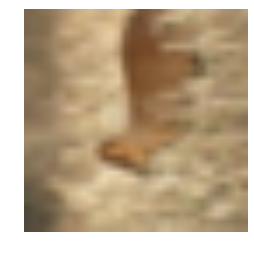

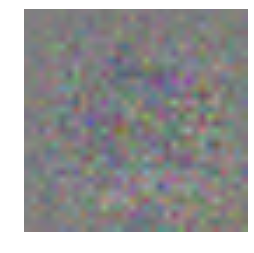

In [8]:
sampler.show_image(real[2])
sampler.show_image(reconstructed[2])

In [13]:
z = np.random.normal(size=[100,sampler.model.z_dim]).astype(np.float32)

In [14]:
random_images = sampler.model.generate(z=z)

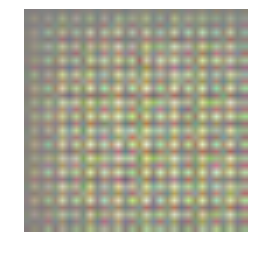

In [18]:
sampler.show_image(random_images[9])